## Loan Prediction (RandomForest)
Used RandomForest for LoanPrediction
---



### Libraries

In [ ]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from math import sqrt

from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

from sklearn.model_selection import KFold, cross_val_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

givenDec = lambda gdVal: float('%.3f' % gdVal) # 1 digit

In [ ]:
df_lp = pd.read_csv('LoanPrediction_train.csv')

#df_lp.describe()
#df_lp.describe(include = "all")

# convert numerical to categorical
df_lp['Married'] =df_lp['Married'].astype('category').cat.codes
df_lp['Gender'] =df_lp['Gender'].astype('category').cat.codes
df_lp['Loan_ID'] =df_lp['Loan_ID'].astype('category').cat.codes
df_lp['Dependents'] =df_lp['Dependents'].astype('category').cat.codes
df_lp['Education'] =df_lp['Education'].astype('category').cat.codes
df_lp['Self_Employed'] =df_lp['Self_Employed'].astype('category').cat.codes
df_lp['Property_Area'] =df_lp['Property_Area'].astype('category').cat.codes
df_lp['Loan_Status'] =df_lp['Loan_Status'].astype('category').cat.codes
# df_lp

# handle the missing values
df_lp['Gender'].fillna(df_lp['Gender'].mode()[0], inplace=True)
df_lp['Married'].fillna(df_lp['Married'].mode()[0], inplace=True)
df_lp['Dependents'].fillna(df_lp['Dependents'].mode()[0], inplace=True)
df_lp['LoanAmount'].fillna(df_lp['LoanAmount'].mode()[0], inplace=True)
df_lp['Loan_Amount_Term'].fillna(df_lp['Loan_Amount_Term'].mode()[0], inplace=True)
df_lp['Credit_History'].fillna(df_lp['Credit_History'].mode()[0], inplace=True)

# do not drop/separate class label "Loan_Status"
df_lp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Model Training

In [ ]:
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42),df_lp.drop("Loan_Status",1), df_lp["Loan_Status"],cv=10, scoring='accuracy')

print("cv_scores %s" %np.round(cv_scores,3))
print("avg_cv_score %s" %np.round(np.mean(cv_scores),3))
print("std_cv_score %s" %np.round(np.std(cv_scores),3))

cv_scores [0.365 0.778 0.738 0.721 0.787 0.787 0.902 0.852 0.77  0.803]
avg_cv_score 0.75
std_cv_score 0.138


### Pearson/spearman correlation

In [ ]:
# pearson/spearman correlation heatmap
df_lp.corr("pearson").style.background_gradient()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1,-0.0563697,-0.00985352,0.0477575,0.039442,0.0364615,0.0169252,0.0392111,0.0373689,-0.0330282,-0.0306028,-0.155416,0.0117734
Gender,-0.0563697,1,0.277459,0.109018,0.0687736,-0.0311164,-0.0246893,0.0736418,0.0200658,-0.0601979,0.0297893,-0.00814194,0.0290395
Married,-0.00985352,0.277459,1,0.345269,0.0225303,0.0301711,0.0476906,0.0832701,0.142161,-0.103662,0.00241851,-0.00337037,0.0755465
Dependents,0.0477575,0.109018,0.345269,1,0.0514137,0.0482211,0.115686,0.033955,0.163491,-0.105889,-0.0264309,-0.0090853,0.0142628
Education,0.039442,0.0687736,0.0225303,0.0514137,1,0.000819562,-0.14076,-0.0622898,-0.169436,-0.0739279,-0.0736578,-0.0652433,-0.0858839
Self_Employed,0.0364615,-0.0311164,0.0301711,0.0482211,0.000819562,1,0.0929674,-0.0523845,0.0819,-0.0177293,-0.0410269,-0.0287297,-0.0113318
ApplicantIncome,0.0169252,-0.0246893,0.0476906,0.115686,-0.14076,0.0929674,1,-0.116605,0.564698,-0.0465311,-0.0186154,-0.00949969,-0.00470952
CoapplicantIncome,0.0392111,0.0736418,0.0832701,0.033955,-0.0622898,-0.0523845,-0.116605,1,0.189723,-0.0593831,0.0111339,0.0105219,-0.0591873
LoanAmount,0.0373689,0.0200658,0.142161,0.163491,-0.169436,0.0819,0.564698,0.189723,1,0.0371517,-0.00024992,-0.0474135,-0.0318084
Loan_Amount_Term,-0.0330282,-0.0601979,-0.103662,-0.105889,-0.0739279,-0.0177293,-0.0465311,-0.0593831,0.0371517,1,-0.00470498,-0.07612,-0.022549


In [ ]:
df_lp.corr("pearson")["Loan_Status"]

Loan_ID              0.011773
Gender               0.029040
Married              0.075547
Dependents           0.014263
Education           -0.085884
Self_Employed       -0.011332
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.031808
Loan_Amount_Term    -0.022549
Credit_History       0.540556
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [ ]:
type(df_lp.corr("pearson")["Loan_Status"])

pandas.core.series.Series

In [ ]:
df_lp.corr("pearson")["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.075547
Property_Area        0.032112
Gender               0.029040
Dependents           0.014263
Loan_ID              0.011773
ApplicantIncome     -0.004710
Self_Employed       -0.011332
Loan_Amount_Term    -0.022549
LoanAmount          -0.031808
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

In [ ]:
abs(df_lp.corr("pearson")["Loan_Status"]).sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Education            0.085884
Married              0.075547
CoapplicantIncome    0.059187
Property_Area        0.032112
LoanAmount           0.031808
Gender               0.029040
Loan_Amount_Term     0.022549
Dependents           0.014263
Loan_ID              0.011773
Self_Employed        0.011332
ApplicantIncome      0.004710
Name: Loan_Status, dtype: float64

In [ ]:
# retrain the model
selected_feats = ["Credit_History", "Education", "Married", "CoapplicantIncome", "Property_Area"]
selected_feats = selected_feats + ["Loan_Status"]
df_lp_new = df_lp[selected_feats]
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42),df_lp_new.drop("Loan_Status",1), df_lp_new["Loan_Status"],cv=10, scoring='accuracy')

print("cv_scores %s" %np.round(cv_scores,3))
print("avg_cv_score %s" %np.round(np.mean(cv_scores),3))
print("std_cv_score %s" %np.round(np.std(cv_scores),3))

cv_scores [0.762 0.794 0.721 0.705 0.738 0.738 0.803 0.803 0.754 0.738]
avg_cv_score 0.756
std_cv_score 0.033


### Mutual Information

In [ ]:
v_listMI = mutual_info_classif(df_lp.drop("Loan_Status", axis=1),df_lp["Loan_Status"], random_state = 1)

pd.Series(v_listMI , df_lp.drop("Loan_Status", axis=1).columns).sort_values(ascending=False)

Credit_History       0.114143
Dependents           0.026985
Education            0.010731
ApplicantIncome      0.006912
Gender               0.006573
Property_Area        0.004257
Loan_ID              0.000729
Self_Employed        0.000530
Loan_Amount_Term     0.000000
LoanAmount           0.000000
CoapplicantIncome    0.000000
Married              0.000000
dtype: float64

In [ ]:
# retrain the model
selected_feats = ["Credit_History", "Dependents", "Education", "ApplicantIncome", "Gender"]
selected_feats = selected_feats + ["Loan_Status"]
df_lp_new = df_lp[selected_feats]
cv_scores = cross_val_score(RandomForestClassifier(n_estimators = 100, random_state=42),df_lp_new.drop("Loan_Status",1), df_lp_new["Loan_Status"],cv=10, scoring='accuracy')

print("cv_scores %s" %np.round(cv_scores,3))
print("avg_cv_score %s" %np.round(np.mean(cv_scores),3))
print("std_cv_score %s" %np.round(np.std(cv_scores),3))

cv_scores [0.762 0.635 0.656 0.639 0.672 0.656 0.738 0.672 0.672 0.754]
avg_cv_score 0.686
std_cv_score 0.045


### Anova f-value

In [ ]:
fvalue, pvalue = f_classif(df_lp.drop("Loan_Status", axis=1),df_lp["Loan_Status"]) # 
print(fvalue, pvalue)

# null hypothesis (H0) is columns (samples) have identical means
# reject H0 if p < \alpha (e.g. 0.05)
pd.Series(np.round(pvalue,3) , df_lp.drop("Loan_Status", axis=1).columns).sort_values(ascending=True)

[8.48430928e-02 5.16531837e-01 3.51290165e+00 1.24522539e-01
 4.54768458e+00 7.85965557e-02 1.35742185e-02 2.15145736e+00
 6.19831189e-01 3.11334050e-01 2.52652090e+02 6.31733319e-01] [7.70937116e-01 4.72599164e-01 6.13688775e-02 7.24301772e-01
 3.33606775e-02 7.79303140e-01 9.07287812e-01 1.42948287e-01
 4.31414809e-01 5.77066759e-01 7.01968203e-48 4.27028351e-01]


Credit_History       0.000
Education            0.033
Married              0.061
CoapplicantIncome    0.143
Property_Area        0.427
LoanAmount           0.431
Gender               0.473
Loan_Amount_Term     0.577
Dependents           0.724
Loan_ID              0.771
Self_Employed        0.779
ApplicantIncome      0.907
dtype: float64

### Chi2

In [ ]:
df_lp_positive = df_lp[(df_lp >= 0).all(1)] # exclude rows with negative values
chi2value, pvalue = chi2(df_lp_positive.drop("Loan_Status", axis=1),df_lp_positive["Loan_Status"])
print(np.round(chi2value,2), np.round(pvalue,2))

pd.Series(np.round(chi2value,3) , df_lp.drop("Loan_Status", axis=1).columns).sort_values(ascending=False)

[1.50000e+01 7.00000e-02 1.98000e+00 3.00000e-02 2.95000e+00 1.20000e-01
 5.64128e+03 3.10402e+03 5.96000e+01 4.30000e-01 2.28600e+01 4.30000e-01] [0.   0.79 0.16 0.86 0.09 0.73 0.   0.   0.   0.51 0.   0.51]


ApplicantIncome      5641.282
CoapplicantIncome    3104.019
LoanAmount             59.602
Credit_History         22.859
Loan_ID                14.999
Education               2.949
Married                 1.981
Property_Area           0.433
Loan_Amount_Term        0.432
Self_Employed           0.121
Gender                  0.072
Dependents              0.032
dtype: float64

### Feature Importances

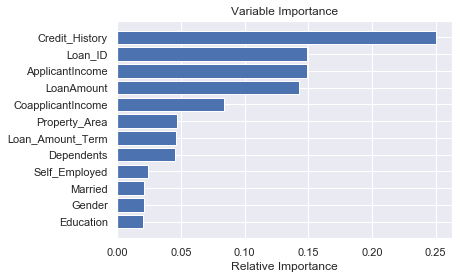

In [ ]:
trainSet, testSet, trainLabels, testLabels = train_test_split(df_lp.drop("Loan_Status", axis=1),df_lp["Loan_Status"], test_size = 0.20, random_state = 42)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(trainSet, trainLabels)
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

features = df_lp.drop("Loan_Status", axis=1).columns
v_important_features = []
v_importance_vals = []
for i,val in enumerate(sorted_idx):
    #print(str(features[val]) + '\t' + str(importances[val]))
    if (importances[val] > 0.015):
        v_important_features.append(features[val])
        v_importance_vals.append(importances[val])

# print(v_important_features)
padding = np.arange(len(v_important_features)) + 0.5
plt.barh(padding, v_importance_vals, align='center')
plt.yticks(padding, v_important_features)
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [ ]:
# retrain the model
selected_feats = ["Credit_History", "ApplicantIncome", "Loan_ID", "CoapplicantIncome", "LoanAmount", "Property_Area"]
selected_feats = selected_feats + ["Loan_Status"]
df_lp_new = df_lp[selected_feats]
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42),df_lp_new.drop("Loan_Status",1), df_lp_new["Loan_Status"],cv=10, scoring='accuracy')

print("cv_scores %s" %np.round(cv_scores,3))
print("avg_cv_score %s" %np.round(np.mean(cv_scores),3))
print("std_cv_score %s" %np.round(np.std(cv_scores),3))

cv_scores [0.381 0.778 0.738 0.738 0.787 0.787 0.869 0.852 0.787 0.738]
avg_cv_score 0.745
std_cv_score 0.129
